# Proyecto 2

**Tema:** Predicción de enfermedades Cardíacas


|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Modelo - Original

### Red Bayesiana

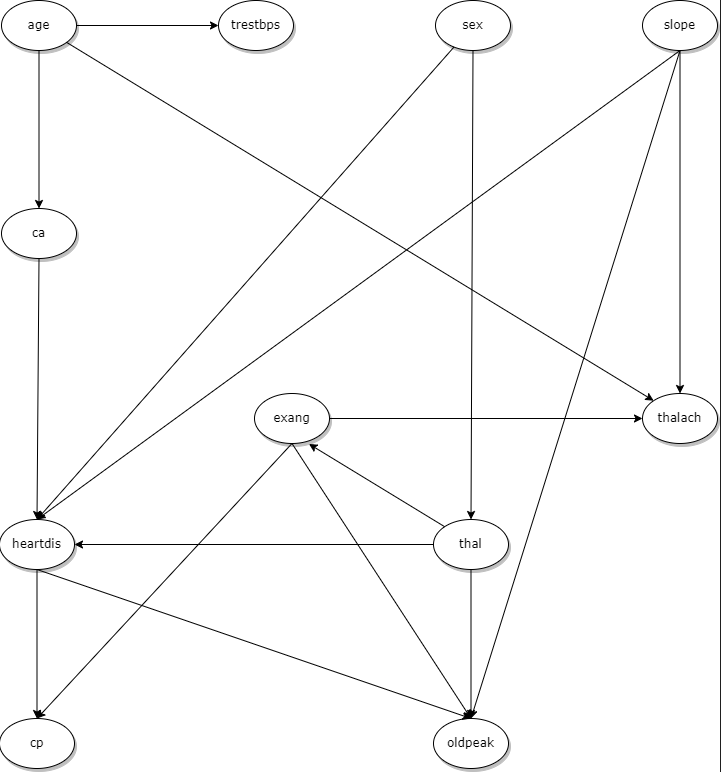

## Librerías Requeridas

In [1]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.readwrite import BIFWriter

## Carga de Datos

In [2]:
df = pd.read_csv("../../../Data/Transformed/Discrete.csv")

## Creación Red

In [3]:
# Creacion del modelo del grafo
model = BayesianNetwork(
    [
        ('age', 'ca'),
        ('age', 'thalach'),
        ('age', 'trestbps'),
        ('sex', 'heartdis'),
        ('sex', 'thal'),
        ('slope', 'heartdis'),
        ('slope', 'oldpeak'),
        ('slope', 'thalach'),
        ('ca', 'heartdis'),
        ('exang', 'cp'),
        ('exang', 'oldpeak'),
        ('exang', 'thalach'),
        ('thal', 'exang'),
        ('thal', 'heartdis'),
        ('thal', 'oldpeak'),
        ('heartdis', 'cp'),
        ('heartdis', 'oldpeak'),
    ]
)

## Parametrización

### Máxima Verosimilitud

In [4]:
model.fit (
    data=df,
    estimator=MaximumLikelihoodEstimator
)
model.check_model()

True

In [5]:
for i in model.nodes():
    print(i)
    print(model.get_cpds(i))

age
+--------+----------+
| age(1) | 0.247525 |
+--------+----------+
| age(2) | 0.250825 |
+--------+----------+
| age(3) | 0.240924 |
+--------+----------+
| age(4) | 0.260726 |
+--------+----------+
ca
+-------+----------------------+-----+---------------------+
| age   | age(1)               | ... | age(4)              |
+-------+----------------------+-----+---------------------+
| ca(0) | 0.88                 | ... | 0.3924050632911392  |
+-------+----------------------+-----+---------------------+
| ca(1) | 0.08                 | ... | 0.25316455696202533 |
+-------+----------------------+-----+---------------------+
| ca(2) | 0.02666666666666667  | ... | 0.21518987341772153 |
+-------+----------------------+-----+---------------------+
| ca(3) | 0.013333333333333334 | ... | 0.13924050632911392 |
+-------+----------------------+-----+---------------------+
thalach
+------------+----------+-----+---------------------+----------+
| age        | age(1)   | ... | age(4)             

## Guardar Modelo

In [6]:
writer = BIFWriter(model)
writer.write_bif('../../../Data/Models/Original.bif')